In [1]:
import osmnx as ox
import networkx as nx
from CVRP import prepare_graph
from solver import solve_CVRP, save_route

In [3]:
### Stats ###
all_clients = 555000
population = 8036

### production pro capita
production_py = 86.2  # kg of bio/ab, 2018
production_pw = production_py / 52  # production per week
production = production_pw / 3  # per abitant per collection

# vehicles
total_trucks = 280
trucks = total_trucks * population // all_clients  # 15, but not enough if no emptying is considered
capacity = 955  # nissan cabstar 35.11
trucks = round(population * production / capacity)

# depot
depot_node = 267

# speed limits assumptions
speed_limits_dict = {'living_street': 20, 'primary': 70, 'primary_link': 70, 'residential': 30, 'road': 30,
                     'secondary': 50, 'secondary_link': 50, 'tertiary': 50, 'tertiary_link': 50, 'unclassified': 50}

In [4]:
G,R_df, G_map = prepare_graph('Caerano, Italy',population, production, depot_node, extract_graph=False)



C:\Users\ASUS\anaconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
C:\Users\ASUS\anaconda3\envs\ox\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [5]:
routes, capacities= solve_CVRP(K = trucks, G=G, R_df=R_df, capacity=capacity)

600
550
500
450
400
350
300
250
200
150
100
50


In [11]:
print(capacities)

[  0.71180392   3.85116974  25.89747193 393.96950224   1.5568753 ]


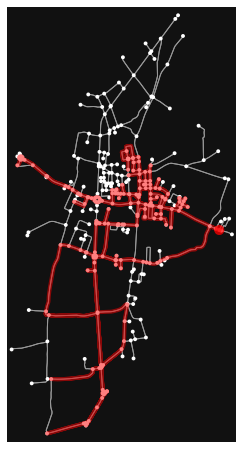

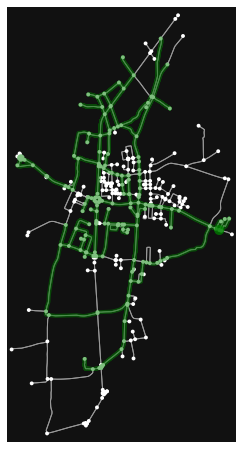

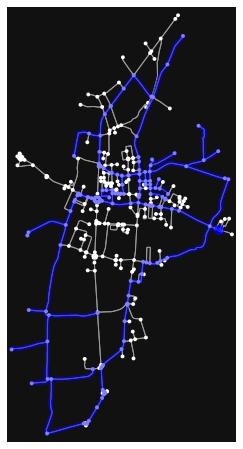

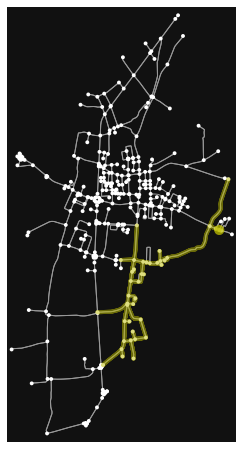

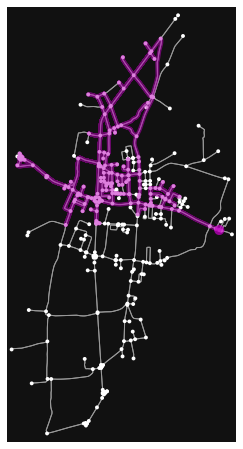

In [12]:
colors = ['r', 'g', 'b', 'y', 'm']
for r in range(5):
    save_route(G_map,routes[r],colors[r],r) 